In [24]:
import numpy as np
import matplotlib.pyplot as plt  

from sklearn.datasets import fetch_olivetti_faces 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [18]:
X, Y =fetch_olivetti_faces(return_X_y=True)

X

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

## Preprocessing

In [19]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape, X_test.shape)

(320, 4096) (80, 4096)


## Pictures

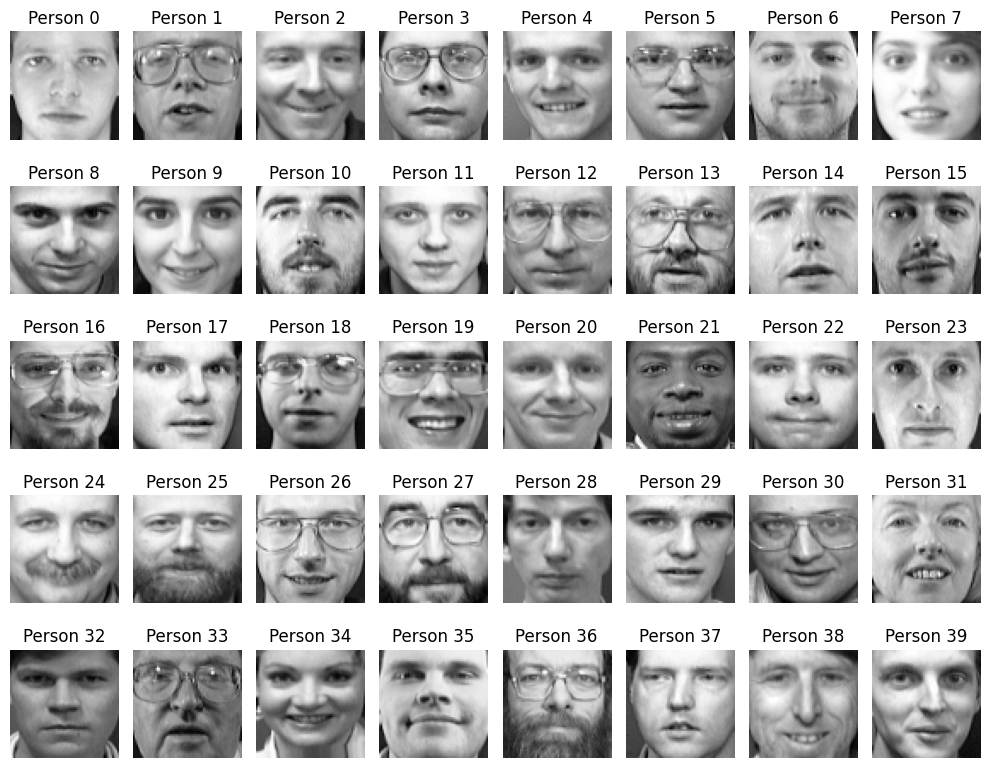

In [20]:
faces = fetch_olivetti_faces()  
images = faces.images  
target = faces.target  
 
plt.figure(figsize=(10, 8))  
 
unique_targets = set(target)  
 
for i, target_value in enumerate(unique_targets):  
    # Find the index of the first occurrence of the target value  
    index = (target == target_value).argmax()  
    
    plt.subplot(5, 8, i + 1)
    plt.imshow(images[index], cmap='gray')  
    plt.axis('off')  
    plt.title(f'Person {target_value}')  

plt.tight_layout()  
plt.show()

## 1) SVM Model

In [21]:
svc_poly = SVC(kernel="poly")
svc_poly.fit(X_train, Y_train)
score = svc_poly.score(X_test, Y_test)
print(score)

accuracy = accuracy_score(Y_test, svc_poly.predict(X_test))
print(accuracy)

0.975
0.975


## 2) Random Forest

In [28]:
clf = RandomForestClassifier(n_estimators=122)
clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)
print(score)

accuracy = accuracy_score(Y_test, clf.predict(X_test))
print(accuracy)

0.925
0.925


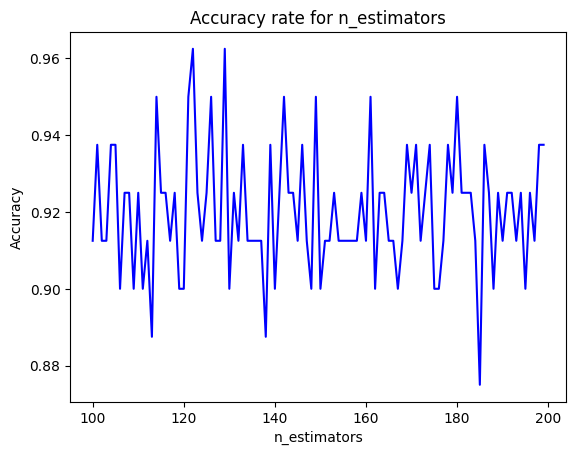

122


In [27]:
list_of_accracies = []

for index in range(100, 200):
    _clf = RandomForestClassifier(n_estimators=index)
    _clf.fit(X_train, Y_train)
    acc = accuracy_score(Y_test, _clf.predict(X_test))
    list_of_accracies.append(acc)
    
plt.plot(list(range(100, 200)), list_of_accracies, color="blue")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy rate for n_estimators")
plt.show()

scores = np.array(list_of_accracies)
index_max = np.argmax(scores) + 100
print(index_max)

## 3) AdaBoost

In [56]:
clf = AdaBoostClassifier(algorithm='SAMME', n_estimators=95, learning_rate=23)
clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)
print(score)

accuracy = accuracy_score(Y_test, clf.predict(X_test))
print(accuracy)

0.175
0.175


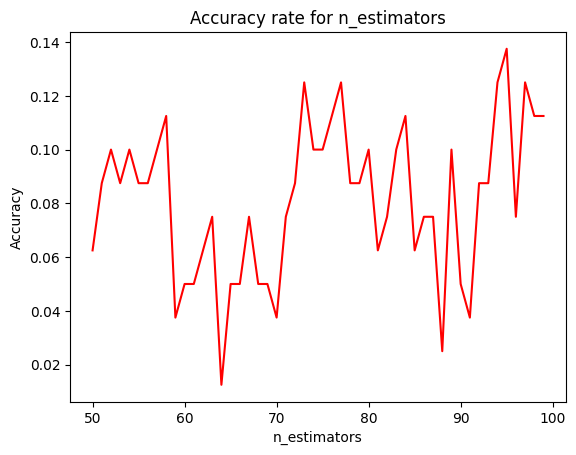

95


In [46]:
list_of_accracies = []

for index in range(50, 100):
    _clf = AdaBoostClassifier(algorithm='SAMME', n_estimators=index)
    _clf.fit(X_train, Y_train)
    acc = accuracy_score(Y_test, _clf.predict(X_test))
    list_of_accracies.append(acc)
    
plt.plot(list(range(50, 100)), list_of_accracies, color="red")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy rate for n_estimators")
plt.show()

scores = np.array(list_of_accracies)
index_max = np.argmax(scores) + 50
print(index_max)

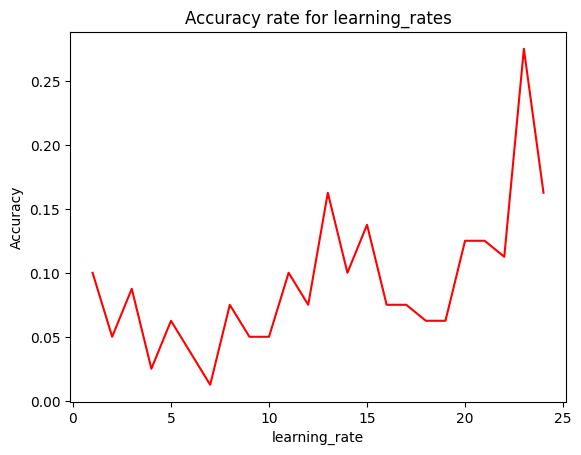

23


In [55]:
list_of_accracies = []

for index in range(1, 25):
    _clf = AdaBoostClassifier(algorithm='SAMME', n_estimators=95, learning_rate=index)
    _clf.fit(X_train, Y_train)
    acc = accuracy_score(Y_test, _clf.predict(X_test))
    list_of_accracies.append(acc)
    
plt.plot(list(range(1, 25)), list_of_accracies, color="red")
plt.xlabel("learning_rate")
plt.ylabel("Accuracy")
plt.title("Accuracy rate for learning_rates")
plt.show()

scores = np.array(list_of_accracies)
index_max = np.argmax(scores) + 1
print(index_max)